In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('../data/kidney_disease.csv')

In [57]:
data = data.drop(columns=['id'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [58]:
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')

In [84]:
numerical_features = []
categorical_features = []

for col in data.columns:
    if np.issubdtype('O', data[col].dtype) and col != "classification":
        categorical_features.append(col)  
    elif col != "classification":
        numerical_features.append(col)

In [60]:
#Replace incorrect values
data['dm'] = data['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
data['cad'] = data['cad'].replace(to_replace = '\tno', value='no')
data['classification'] = data['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [63]:
data[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   bgr     400 non-null    float64
 6   bu      400 non-null    float64
 7   sc      400 non-null    float64
 8   sod     400 non-null    float64
 9   pot     400 non-null    float64
 10  hemo    400 non-null    float64
 11  pcv     400 non-null    float64
 12  wc      400 non-null    float64
 13  rc      400 non-null    float64
dtypes: float64(14)
memory usage: 43.9 KB


In [62]:
# Average value
for col in data.columns:
    if col in numerical_features:
        data[col] = data[col].fillna(data[col].mean())
for col in data.columns:
    if col in categorical_features: 
        data.fillna(data[col].value_counts().index[0],inplace=True)

In [127]:
df_oh = pd.concat([data[numerical_features],pd.get_dummies(data[categorical_features])],axis=1)
df_oh['target'] = le.fit_transform(data['classification'])

In [133]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
df = data[categorical_features+numerical_features]
df['target'] = data['classification']
df[categorical_features] = oe.fit_transform(data[categorical_features])
df[numerical_features] = data[numerical_features]
df['target'] = le.fit_transform(df['target'])
features = categorical_features + numerical_features

In [136]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,mutual_info_classif,chi2
fs = SelectKBest(score_func=chi2, k=5)

y = df['target']
X = df[features]
fs.fit(X, y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000022BEA541318>)

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X,y)

PCA(n_components=5)

In [147]:
pca.score_samples

<bound method PCA.score_samples of PCA(n_components=5)>

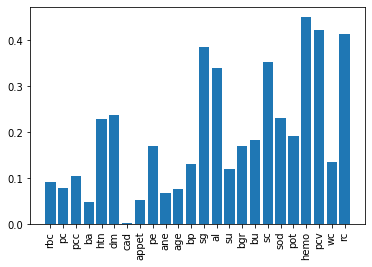

In [119]:
plt.bar(df[features].columns,fs.scores_)
plt.xticks(rotation='vertical')
plt.show()

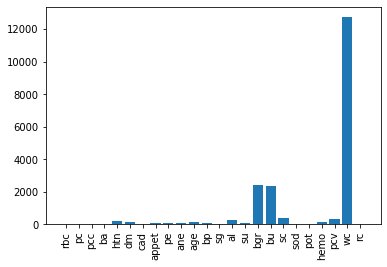

In [137]:
plt.bar(df[features].columns,fs.scores_)
plt.xticks(rotation='vertical')
plt.show()

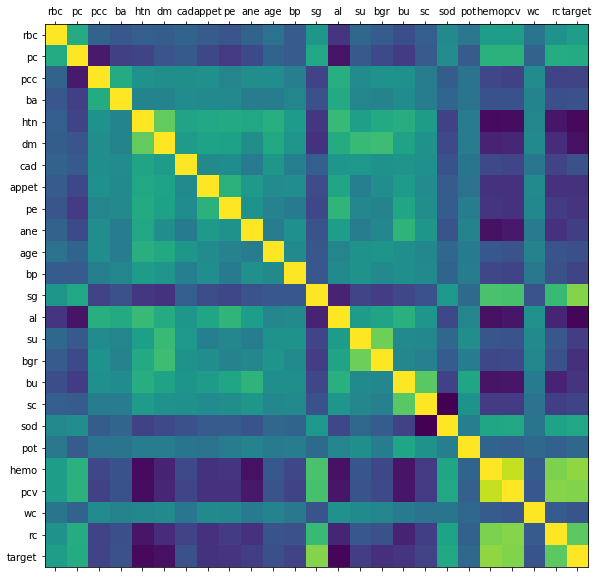

In [117]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(df)

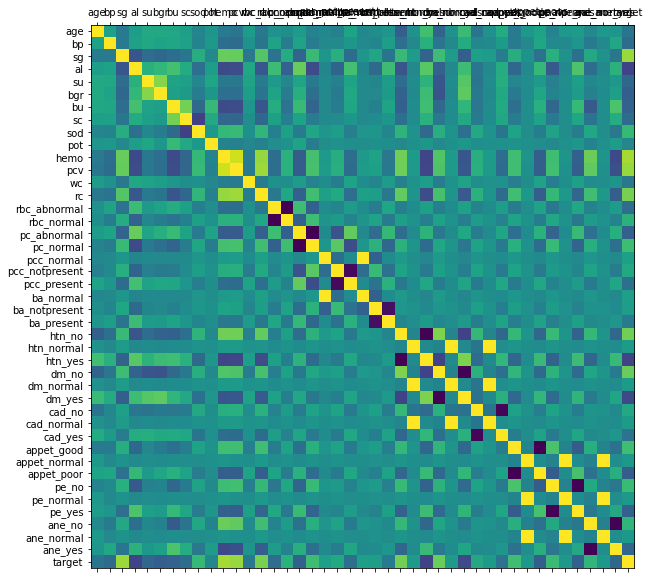

In [130]:
plot_corr(df_oh)